In [2]:
using Pkg

In [3]:
Pkg.activate(".")

 Activating environment at `C:\Users\Gladwell\Documents\GitHub\AIG\AIG_Assignment_1\Project.toml`


In [4]:
Pkg.instantiate()

In [7]:
Pkg.add("DataFrames")
Pkg.add("CSV")
Pkg.add("PyCall")
Pkg.add("Plots") 
Pkg.add("Statistics")

   Updating registry at `C:\Users\Gladwell\.julia\registries\General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  100.0 %=>                                       ]  0.9 % %7 % [==================>                      ]  44.0 %===========================>             ]  66.4 %]  75.9 %]  87.9 %

  Resolving package versions...
   Updating `C:\Users\Gladwell\Documents\GitHub\AIG\AIG_Assignment_1\Project.toml`
 [no changes]
   Updating `C:\Users\Gladwell\Documents\GitHub\AIG\AIG_Assignment_1\Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `C:\Users\Gladwell\Documents\GitHub\AIG\AIG_Assignment_1\Project.toml`
 [no changes]
   Updating `C:\Users\Gladwell\Documents\GitHub\AIG\AIG_Assignment_1\Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `C:\Users\Gladwell\Documents\GitHub\AIG\AIG_Assignment_1\Project.toml`
 [no changes]
   Updating `C:\Users\Gladwell\Documents\GitHub\AIG\AIG_Assignment_1\Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `C:\Users\Gladwell\Documents\GitHub\AIG\AIG_Assignment_1\Project.toml`
 [no changes]
   Updating `C:\Users\Gladwell\Documents\GitHub\AIG\AIG_Assignment_1\Manifest.toml`
 [no changes]


In [8]:
using CSV
using DataFrames
using Plots
using PyCall

In [9]:
#readlines("bank-additional-full.csv")

CSV.read("bank-additional-full.csv");

In [11]:
readlines("bank-additional-full.csv");

41189-element Array{String,1}:
 "\"age\";\"job\";\"marital\";\"education\";\"default\";\"housing\";\"loan\";\"contact\";\"month\";\"day_of_week\";\"duration\";\"campaign\";\"pdays\";\"previous\";\"poutcome\";\"emp.var.rate\";\"cons.price.idx\";\"cons.conf.idx\";\"euribor3m\";\"nr.employed\";\"y\""
 "56;\"housemaid\";\"married\";\"basic.4y\";\"no\";\"no\";\"no\";\"telephone\";\"may\";\"mon\";261;1;999;0;\"nonexistent\";1.1;93.994;-36.4;4.857;5191;\"no\""
 "57;\"services\";\"married\";\"high.school\";\"unknown\";\"no\";\"no\";\"telephone\";\"may\";\"mon\";149;1;999;0;\"nonexistent\";1.1;93.994;-36.4;4.857;5191;\"no\""
 "37;\"services\";\"married\";\"high.school\";\"no\";\"yes\";\"no\";\"telephone\";\"may\";\"mon\";226;1;999;0;\"nonexistent\";1.1;93.994;-36.4;4.857;5191;\"no\""
 "40;\"admin.\";\"married\";\"basic.6y\";\"no\";\"no\";\"no\";\"telephone\";\"may\";\"mon\";151;1;999;0;\"nonexistent\";1.1;93.994;-36.4;4.857;5191;\"no\""
 "56;\"services\";\"married\";\"high.school\";\"no\";\"no\

In [10]:
#Create a DataFrame by passing '|> DataFrames' to convert the CSV to a dataFrame
df = CSV.read("bank-additional-full.csv") |> DataFrame

,age,job,marital,education,default,housing,loan
,Int64,String,String,String,String,String,String
1,56,housemaid,married,basic.4y,no,no,no
2,57,services,married,high.school,unknown,no,no
3,37,services,married,high.school,no,yes,no
4,40,admin.,married,basic.6y,no,no,no
5,56,services,married,high.school,no,no,yes
6,45,services,married,basic.9y,unknown,no,no
7,59,admin.,married,professional.course,no,no,no
8,41,blue-collar,married,unknown,unknown,no,no
9,24,technician,single,professional.course,no,yes,no


In [19]:
describe(df);

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,age,40.0241,17,38.0,98,,,Int64
2,job,,admin.,,unknown,12,,String
3,marital,,divorced,,unknown,4,,String
4,education,,basic.4y,,unknown,8,,String
5,default,,no,,yes,3,,String
6,housing,,no,,yes,3,,String
7,loan,,no,,yes,3,,String
8,contact,,cellular,,telephone,2,,String
9,month,,apr,,sep,10,,String


In [18]:
describe(df);

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,age,40.0241,17,38.0,98,,,Int64
2,job,,admin.,,unknown,12,,String
3,marital,,divorced,,unknown,4,,String
4,education,,basic.4y,,unknown,8,,String
5,default,,no,,yes,3,,String
6,housing,,no,,yes,3,,String
7,loan,,no,,yes,3,,String
8,contact,,cellular,,telephone,2,,String
9,month,,apr,,sep,10,,String


In [29]:
#Check for consistencies with the column names
first(df, 15);

,age,job,marital,education,default,housing,loan,contact
,Int64,String,String,String,String,String,String,String
1,56,housemaid,married,basic.4y,no,no,no,telephone
2,57,services,married,high.school,unknown,no,no,telephone
3,37,services,married,high.school,no,yes,no,telephone
4,40,admin.,married,basic.6y,no,no,no,telephone
5,56,services,married,high.school,no,no,yes,telephone
6,45,services,married,basic.9y,unknown,no,no,telephone
7,59,admin.,married,professional.course,no,no,no,telephone
8,41,blue-collar,married,unknown,unknown,no,no,telephone
9,24,technician,single,professional.course,no,yes,no,telephone


In [30]:
#Check the names of all the columns and check for inconsistency
names(df);

21-element Array{String,1}:
 "age"
 "job"
 "marital"
 "education"
 "default"
 "housing"
 "loan"
 "contact"
 "month"
 "day_of_week"
 "duration"
 "campaign"
 "pdays"
 "previous"
 "poutcome"
 "emp.var.rate"
 "cons.price.idx"
 "cons.conf.idx"
 "euribor3m"
 "nr.employed"
 "y"

In [20]:
#Change the number of columns printed when using jupyter notebook to check for columns with missing values
ENV["COLUMNS"], ENV["LINES"] = 300, 30

(300, 30)

In [21]:
#Check for missing values in the dataset
df1 = CSV.File("bank-additional-full.csv",missingstrings=["NA", "na", "n/a", "missing"]) |> DataFrame

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
,Int64,String,String,String,String,String,String,String,String,String,Int64,Int64,Int64,Int64,String,Float64,Float64,Float64,Float64,Float64,String
1,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [30]:
union(eachrow(df));

In [29]:
union(eachcol(df));

In [52]:
Pkg.add("PyCall")

  Resolving package versions...
   Updating `C:\Users\Gladwell\Documents\GitHub\AIG\AIG_Assignment_1\Project.toml`
 [no changes]
   Updating `C:\Users\Gladwell\Documents\GitHub\AIG\AIG_Assignment_1\Manifest.toml`
 [no changes]


In [54]:
import PyCall
math = PyCall.pyimport("math")
math.sin(math.pi/4)

┌ Info: Precompiling PyCall [438e738f-606a-5dbb-bf0a-cddfbfd45ab0]
└ @ Base loading.jl:1260


0.7071067811865476

In [57]:
py"""
import numpy as np
import math

def sinpi(x):
    return math.sin(math.pi * x)
"""
py"sinpi"(1)

LoadError: UndefVarError: @py_str not defined

In [7]:
Pkg.add("Plots")
using Plots
#p = histogram(randn(1000), bins=:scott, weights=repeat(1:5, outer=200))

   Updating registry at `C:\Users\Gladwell\.julia\registries\General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  100.0 %>                                      ]  3.3 %.8 %.6 % [===========>                             ]  27.3 %1 % %===============>                         ]  35.3 %                         ]  35.5 %36.6 %===============>                         ]  36.8 %===============>                         ]  36.9 %Fetching: [===============>                         ]  37.1 %===============>                         ]  37.2 %]  46.7 %.5 %]  47.6 % [====================>                    ]  47.8 % [====================>                    ]  47.9 % [====================>                    ]  48.1 % %.4 %>                    ]  48.6 %>                    ]  48.7 %]  48.9 % % [========================>                ]  57.7 %]  64.7 % [===========================>             ]  67.4 %>        ]  79.7 %=================================>       ]  82.3 %2 %>   ]  91.0 %.0 %

  Resolving package versions...
  Installed Showoff ───────── v0.3.1
  Installed x265_jll ──────── v3.0.0+1
  Installed libfdk_aac_jll ── v0.1.6+2
  Installed Measures ──────── v0.3.1
  Installed RecipesPipeline ─ v0.1.9
  Installed Contour ───────── v0.5.3
  Installed Plots ─────────── v1.3.2
  Installed StaticArrays ──── v0.12.3
  Installed FreeType2_jll ─── v2.10.1+2
  Installed LAME_jll ──────── v3.100.0+1
  Installed libvorbis_jll ─── v1.3.6+4
  Installed libass_jll ────── v0.14.0+2
  Installed Opus_jll ──────── v1.3.1+1
  Installed OpenSSL_jll ───── v1.1.1+2
  Installed Bzip2_jll ─────── v1.0.6+2
  Installed GR ────────────── v0.49.1
  Installed PlotUtils ─────── v1.0.3
  Installed LibVPX_jll ────── v1.8.1+1
  Installed FFMPEG_jll ────── v4.1.0+3
  Installed Ogg_jll ───────── v1.3.4+0
  Installed GeometryTypes ─── v0.8.3
  Installed FFMPEG ────────── v0.3.0
  Installed StatsBase ─────── v0.33.0
  Installed RecipesBase ───── v1.0.1
  Installed NaNMath ───────── v0.3.3
  Installed 

In [28]:
plot();

In [27]:
df;

In [26]:
#Remove duplicate rows from the DataFramedf 
df = unique(df);

In [25]:
#df

plot.figure(figsize=(8,6))
Y = data["y"]
total = len(Y)*1.
ax=sns.countplot(x="y", data=data)
for p in ax.patches:
  ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
#adjust the ticklabel to the desired format, without changing the position of the ticks.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# ax.legend(labels=["no","yes"])
plot.show()



ErrorException: type #plot has no field figure

In [29]:
#check if any column has missing values
colwise(x -> sum(ismissing.(x)), df)

┌ Warning: `colwise(f, d::AbstractDataFrame)` is deprecated, use `[f(col) for col = eachcol(d)]` instead.
│   caller = top-level scope at In[29]:1
└ @ Core In[29]:1


21-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

  Resolving package versions...
   Updating `C:\Users\Gladwell\Documents\GitHub\AIG\AIG_Assignment_1\Project.toml`
 [no changes]
   Updating `C:\Users\Gladwell\Documents\GitHub\AIG\AIG_Assignment_1\Manifest.toml`
 [no changes]
  Resolving package versions...
  Installed Pandas ─────────── v1.4.0
  Installed Seaborn ────────── v0.4.1
  Installed TableTraitsUtils ─ v1.0.1
  Installed DataValues ─────── v0.4.13
   Updating `C:\Users\Gladwell\Documents\GitHub\AIG\AIG_Assignment_1\Project.toml`
  [d2ef9438] + Seaborn v0.4.1
   Updating `C:\Users\Gladwell\Documents\GitHub\AIG\AIG_Assignment_1\Manifest.toml`
  [e7dc6d0d] + DataValues v0.4.13
  [50d2b5c4] + Lazy v0.15.0
  [eadc2687] + Pandas v1.4.0
  [d2ef9438] + Seaborn v0.4.1
  [382cd787] + TableTraitsUtils v1.0.1
  Resolving package versions...
   Updating `C:\Users\Gladwell\Documents\GitHub\AIG\AIG_Assignment_1\Project.toml`
  [10745b16] + Statistics 
   Updating `C:\Users\Gladwell\Documents\GitHub\AIG\AIG_Assignment_1\Manifest.toml`
 [no 

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Gladwell\.julia\conda\3

  added / updated specs:
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pandas-1.0.3               |   py37h47e9c7a_0         7.4 MB
    pytz-2020.1                |             py_0         184 KB
    ------------------------------------------------------------
                                           Total:         7.6 MB

The following NEW packages will be INSTALLED:

  pandas             pkgs/main/win-64::pandas-1.0.3-py37h47e9c7a_0
  pytz               pkgs/main/noarch::pytz-2020.1-py_0



pytz-2020.1          | 184 KB    | ########## | 100% 
pandas-1.0.3         | 7.4 MB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


┌ Info: Installing seaborn via the Conda seaborn package...
└ @ PyCall C:\Users\Gladwell\.julia\packages\PyCall\zqDXB\src\PyCall.jl:697
┌ Info: Running `conda install -y seaborn` in root environment
└ @ Conda C:\Users\Gladwell\.julia\packages\Conda\3rPhK\src\Conda.jl:113


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Gladwell\.julia\conda\3

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    scipy-1.4.1                |   py37h9439919_0        11.9 MB
    seaborn-0.10.1             |             py_0         163 KB
    ------------------------------------------------------------
                                           Total:        12.0 MB

The following NEW packages will be INSTALLED:

  scipy              pkgs/main/win-64::scipy-1.4.1-py37h9439919_0
  seaborn            pkgs/main/noarch::seaborn-0.10.1-py_0



seaborn-0.10.1       | 163 KB    | ########## | 100% 
scipy-1.4.1          | 11.9 MB   | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


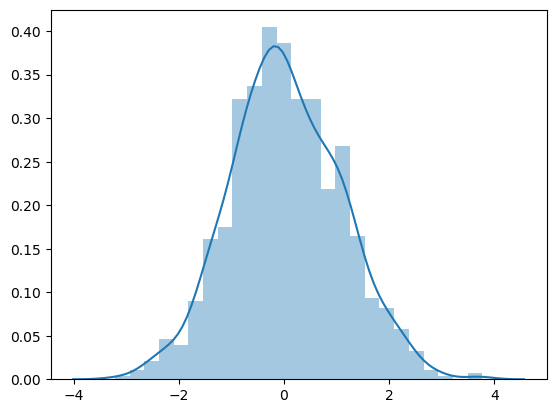

PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x00000000630F5808>

In [32]:
Pkg.add("PyPlot")
Pkg.add("Seaborn")
Pkg.add("Statistics")

using PyPlot
using PyCall
using Seaborn
x=randn(1000)
distplot(x)

In [ ]:
using DataFrames, VegaLite

df = DataFrame(is_bad=rand(Bool, 10_000))

df |> @vlplot(:bar, x="is_bad:n", y="count()")

  Resolving package versions...
  Installed FilePaths ──────── v0.8.0
  Installed NodeJS ─────────── v1.1.1
  Installed FilePathsBase ──── v0.6.2
  Installed ConstructionBase ─ v1.0.0
  Installed Setfield ───────── v0.6.0
  Installed BinaryProvider ─── v0.5.9
  Installed VegaLite ───────── v2.1.3
  Installed Vega ───────────── v0.1.1
  Installed JSONSchema ─────── v0.2.0
   Updating `C:\Users\Gladwell\Documents\GitHub\AIG\AIG_Assignment_1\Project.toml`
  [112f6efa] + VegaLite v2.1.3
   Updating `C:\Users\Gladwell\Documents\GitHub\AIG\AIG_Assignment_1\Manifest.toml`
  [b99e7846] + BinaryProvider v0.5.9
  [324d7699] ↑ CategoricalArrays v0.8.0 ⇒ v0.8.1
  [187b0558] + ConstructionBase v1.0.0
  [5789e2e9] + FileIO v1.3.0
  [8fc22ac5] + FilePaths v0.8.0
  [48062228] ↓ FilePathsBase v0.8.0 ⇒ v0.6.2
  [cd3eb016] + HTTP v0.8.14
  [83e8ac13] + IniFile v0.5.0
  [7d188eb4] + JSONSchema v0.2.0
  [739be429] + MbedTLS v1.0.2
  [c8ffd9c3] + MbedTLS_jll v2.16.0+2
  [2bd173c7] + NodeJS v1.1.1
  [efcf157

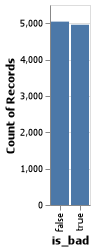

In [36]:
Pkg.add("VegaLite")
using VegaLite

df = DataFrame(is_bad=rand(Bool, 10_000))

df |> @vlplot(:bar, x="is_bad:n", y="count()")

In [1]:
df = DataFrame(is_bad=rand(Bool, 10_000))

df |> @vlplot(:bar, x="is_bad:n", y="count()")

UndefVarError: UndefVarError: DataFrame not defined